## Flipping coins

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, describe, find_repeats, relfreq

In [13]:
# Set the random seed to reproduce the results
np.random.seed(42)
# Simulate one coin flip with 35% chance of getting heads
coin_flip = bernoulli.rvs(p=0.35, size=1)

In [14]:
coin_flip

array([0])

In [15]:
# Simulate ten coin flips and get the number of heads
np.random.seed(42)
ten_coin_flips=bernoulli.rvs(p=0.35, size=10)

In [17]:
ten_coin_flips

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [18]:
ten_coin_flips.sum()

4

## Using binom to flip even more coins

Previously, you simulated 10 coin flips with a 35% chance of getting heads using bernoulli.rvs().

This exercise loads the binom object from scipy.stats so you can use binom.rvs() to simulate 20 trials of 10 coin flips with a 35% chance of getting heads on each coin flip.

In [23]:
# Use the binom.rvs() function to simulate 20 trials of 10 coin flips with a 35% chance of getting heads.
draws = binom.rvs(n=10, p=0.35, size=20)

In [24]:
draws

array([4, 2, 3, 3, 3, 5, 2, 4, 4, 1, 4, 2, 1, 6, 6, 5, 3, 2, 4, 3])

## Predicting the probability of defects

Any situation with exactly two possible outcomes can be modeled with binomial random variables. For example, you could model if someone likes or dislikes a product, or if they voted or not.

Let's model whether or not a component from a supplier comes with a defect. From the thousands of components that we got from a supplier, we are going to take a sample of 50, selected randomly. The agreed and accepted defect rate is 2%.

Recall that:

* binom.pmf() calculates the probability of having exactly k heads out of n coin flips.
* binom.cdf() calculates the probability of having k heads or less out of n coin flips.
* binom.sf() calculates the probability of having more than k heads out of n coin flips.

In [27]:
# Probability of getting exactly 1 defective component
prob_one_defect = binom.pmf(k=1, n=50, p=0.02)

In [28]:
prob_one_defect

0.37160171437460954

In [29]:
# Probability of not getting any defective components
prob_no_defects = binom.pmf(k=0, n=50, p=0.02)

In [30]:
prob_no_defects

0.36416968008711675

In [31]:
# Probability of getting 2 or less defective components
prob_two_or_less_defects = binom.cdf(k=2, n=50, p=0.02)

In [32]:
prob_two_or_less_defects

0.9215722516490309

## Predicting employment status

Consider a survey about employment that contains the question "Are you employed?" It is known that 65% of respondents will answer "yes." Eight survey responses have been collected.

In [38]:
# Calculate the probability of getting exactly 5 yes responses
employment_survey_5_yes = binom.pmf(k=5, p=0.65, n=8)

In [39]:
employment_survey_5_yes

0.2785857790625

In [44]:
# Calculate the probability of getting 3 or less no responses
employment_survey_3_or_less_no = 1 -binom.cdf(k=3, n=8, p=0.65)

In [45]:
employment_survey_3_or_less_no

0.8939090951171875

In [46]:
# Calculate the probability of getting more than 3 yes responses
prob_more_than_three_yes = binom.sf(k=3, n=8, p =0.65)

In [47]:
prob_more_than_three_yes

0.8939090951171875

## Predicting burglary conviction rate

There are many situations that can be modeled with only two outcomes: success or failure. This exercise presents a situation that can be modeled with a binomial distribution and gives you the opportunity to calculate probabilities using binom.pmf(), binom.cdf(), and binom.sf().

Imagine that in your town there are many crimes, including burglaries, but only 20% of them get solved. Last week, there were 9 burglaries. Answer the following questions.

In [48]:
# What is the probability of solving 4 burglaries?
four_solved_burg = binom.pmf(k=4, n=9, p=0.2)

In [49]:
four_solved_burg

0.066060288

In [50]:
# What is the probability of solving more than 3 burglaries?
more_that_3_solved_burg = binom.sf(k=3, n=9, p=0.2)

In [51]:
more_that_3_solved_burg

0.08564172800000006

In [52]:
# What is the probability of solving 2 or 3 burglaries?
two_or_three_solved_burg = binom.pmf(k=2, n=9, p=0.2) + binom.pmf(k=3, n=9, p=0.2)

In [53]:
two_or_three_solved_burg

0.47815065600000023

In [54]:
# What is the probability of solving 1 or fewer or more than 7 burglaries?
tail_probabilities = binom.cdf(k=1, n=9, p=0.2) + binom.sf(k=7, n=9, p=0.2)

In [55]:
tail_probabilities

0.4362265599999997

In [56]:
binom.cdf(k=1, n=9, p=0.2)

0.4362076159999997

In [58]:
binom.sf(k=7, n=9, p=0.2)

1.894400000000001e-05

## Calculating the sample mean

Simulation involves generating samples and then measuring. In this exercise, we'll generate some samples and calculate the sample mean with the describe() method. See what you observe about the sample mean as the number of samples increases.

In [64]:
# Sample mean from a generated sample of 100 fair coin flips
sample_100_flips = binom.rvs(n=1, p=0.5, size=100)

In [65]:
sample_100_flips

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0])

In [75]:
sample_100_flips.mean(), sample_100_flips.var(), sample_100_flips.std()

(0.54, 0.24839999999999995, 0.49839743177508444)

In [70]:
describe(sample_100_flips).mean

0.54

In [74]:
describe(sample_100_flips).variance

0.25090909090909086

In [76]:
# Sample mean from a generated sample of 1,000 fair coin flips
sample_1000_flips = binom.rvs(n=1, p=0.5, size=1000)

In [77]:
sample_1000_flips.mean(), sample_1000_flips.var(), sample_1000_flips.std()

(0.51, 0.24989999999999998, 0.4998999899979995)

In [78]:
# Sample mean from a generated sample of 2,000 fair coin flips
sample_2000_flips = binom.rvs(n=1, p=0.5, size=2000)

In [79]:
sample_2000_flips.mean(), sample_2000_flips.var(), sample_2000_flips.std()

(0.5005, 0.24999975, 0.4999997499999375)

## Checking the result

Now try generating some samples and calculating the expected value and variance yourself, then using the method provided by binom to check if the sample values match the theoretical values.

Var(X)=n×p×(1−p)

In [80]:
sample = binom.rvs(n=10, p=0.3, size=2000)

# Calculate the sample mean and variance from the sample variable
sample_describe = describe(sample)

# Calculate the sample mean using the values of n and p
mean = 10*0.3

# Calculate the sample variance using the value of 1-p
variance = mean* (1-0.3)

# Calculate the sample mean and variance for 10 coin flips with p=0.3
binom_stats = binom.stats(n=10, p=0.3)

print(sample_describe.mean, sample_describe.variance, mean, variance, binom_stats)

2.9725 2.022755127563782 3.0 2.0999999999999996 (array(3.), array(2.1))


## Calculating the mean and variance of a sample

Now that you're familiar with working with coin flips using the binom object and calculating the mean and variance, let's try simulating a larger number of coin flips and calculating the sample mean and variance. Comparing this with the theoretical mean and variance will allow you to check if your simulated data follows the distribution you want.

In [86]:
# Inside a loop, create a sample variable with 10 trials of 10 coin flips with 25% probability of getting heads.
averages = [describe(binom.rvs(n=10, p=0.25, size=10)).mean for _ in range(1500)]

In [88]:
variances = [describe(binom.rvs(n=10, p=0.25, size=10)).variance for _ in range(1500)]

In [90]:
np.mean(averages), np.mean(variances)

(2.5014, 1.8791259259259259)

Using the binom.stats() function, calculate the theoretical mean and variance using 10 coin flips and a 25% probability of getting heads and compare your results from the previous exercise to the expected values for the mean and variance.

In [96]:
binom.stats(n=10, p=0.25)

(array(2.5), array(1.875))

## Measuring a sample

Let's work with a sample of coin flips to calculate some probabilities. You will calculate absolute and relative frequency and check the theoretical value from the distribution of the sample data.

The array sample_of_two_coin_flips has 1,000 experiments, each consisting of two fair coin flips. For each experiment, we record the number of heads out of the two coin flips: 0, 1, or 2.

In [137]:
sample_of_two_coin_flips = np.random.randint(3, size=1000)

In [117]:
type(sample_of_two_coin_flips)

numpy.ndarray

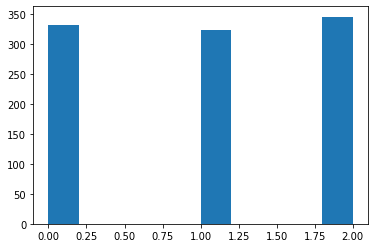

In [118]:
plt.hist(sample_of_two_coin_flips); 

In [120]:
# Count how many times you got 2 heads from the sample data
count_2_heads = find_repeats(sample_of_two_coin_flips).counts[2]

In [121]:
count_2_heads

345

In [123]:
pd.Series(sample_of_two_coin_flips).value_counts()

2    345
0    332
1    323
dtype: int64

In [124]:
# Divide the number of heads by the total number of draws
prob_2_heads = count_2_heads / 1000
# Display the result
print(prob_2_heads)

0.345


In [126]:
# Get the relative frequency from sample_of_two_coin_flips
# Set numbins as 3
# Extract frequency
rel_freq = relfreq(sample_of_two_coin_flips, numbins=3).frequency
print(rel_freq)

[0.332 0.323 0.345]


In [135]:
# Calculate the probability of getting 0, 1, or 2 from a binomial distribution with n=2 and p=0.5.
# Probability of getting 0, 1, or 2 from the distribution
prob = binom.pmf([0, 1, 2], n=2, p=0.5)

In [133]:
prob

array([0.25, 0.5 , 0.25])

## Joint probabilities